In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.signal import find_peaks
import time

%matplotlib notebook

In [8]:
def plot_bed(length, thickness, stress):
    #plot a bed with tensile stress 
    
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.imshow(stress[np.newaxis,:], extent=(0, length, 0, thickness),
             cmap='coolwarm', aspect='equal', vmax=stress.max(), vmin=0)

    return fig, ax

def update_bed(ax, length, thickness, stress, vmax=-1):
    #update the bed with new tensile stress
    
    min_stress = stress.min()
    peaks, _ = find_peaks(-stress, prominence=1)
    for p in peaks:
        plt.plot([p, p], [0, thickness], 'w-')
    
    vmax = max(vmax, stress.max())
    im = ax.imshow(stress[np.newaxis,:], extent=(0, length, 0, thickness),
             cmap='coolwarm', aspect='equal', vmax=vmax, vmin=0)

def stress_from_joint(remote_stress, bed_thickness, x):
    #calculate stress reduction with distance x away from a joint
    
    stress = remote_stress*(abs(x**3)*(x**2+(bed_thickness/2)**2)**(-3/2)-1)
    return stress

def stress_reduction_due_to_joint(position, remote_stress, bed_length, bed_thickness):
    #calculate stress reduction in a bed due to a joint
    
    reduced_stress = np.array([])
    for d in np.linspace(0, bed_length, bed_length):
        s = stress_from_joint(remote_stress, bed_thickness, abs(position-d))
        reduced_stress = np.append(reduced_stress, s)
        
    return reduced_stress

<IPython.core.display.Javascript object>


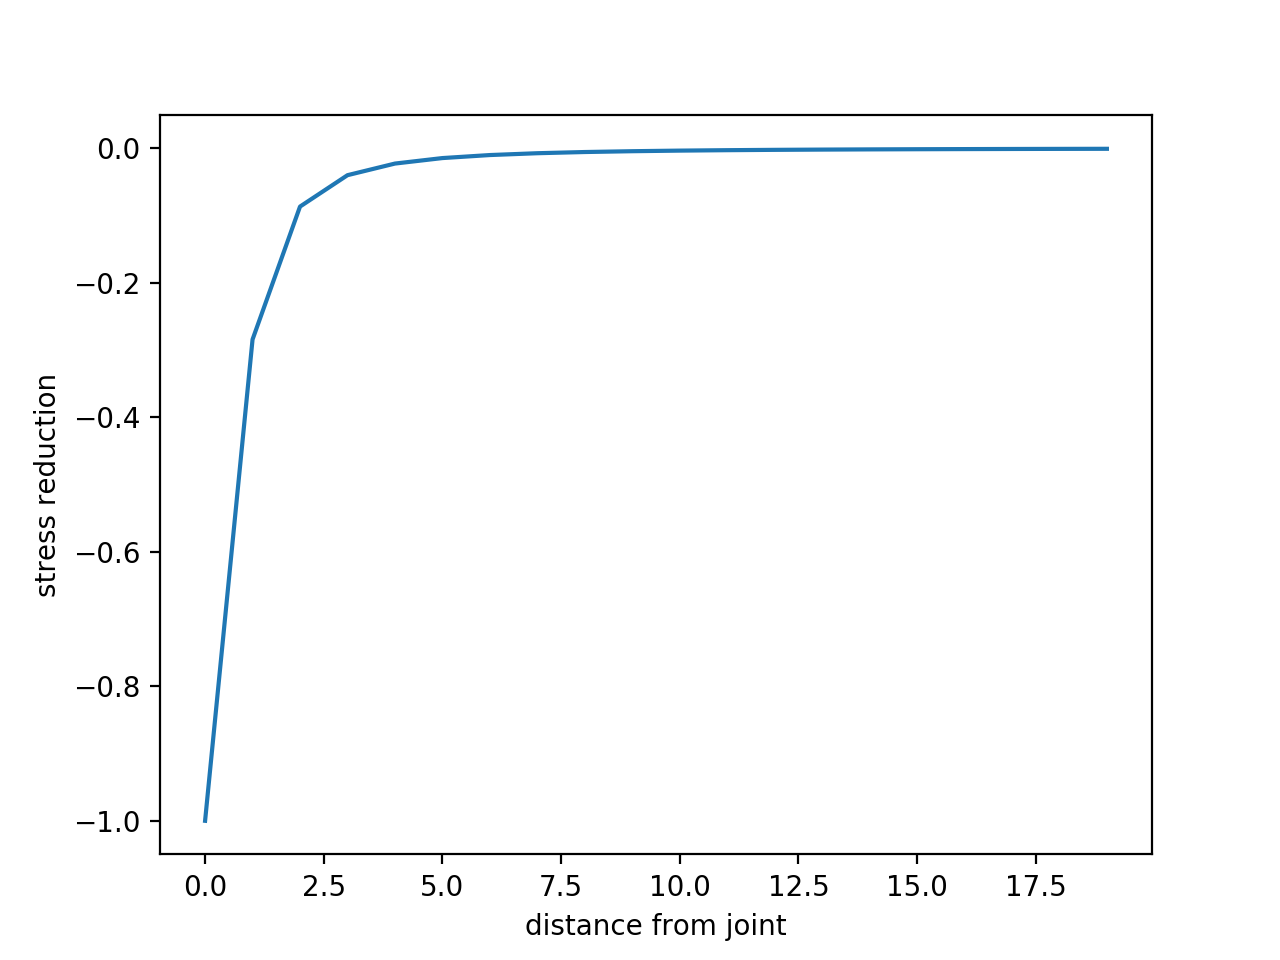

Text(0, 0.5, 'stress reduction')

In [9]:
bed_tick = 1
remote_stress = 1

d = range(0, 20)
s = []
for i in d:
    s.append(stress_from_joint(remote_stress, bed_tick, i))
    
plt.figure()
plt.plot(d, s)
plt.xlabel('distance from joint')
plt.ylabel('stress reduction')

<IPython.core.display.Javascript object>


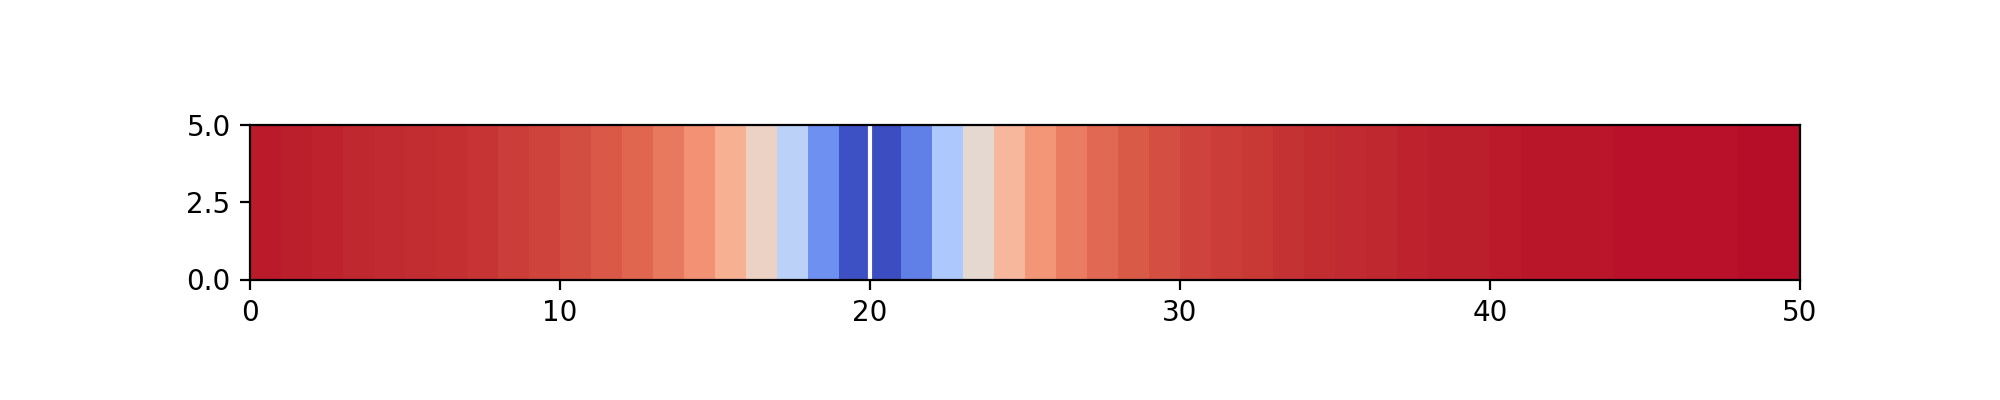

In [10]:
length = 50
thickness = 5
remote_stress = 20
stress = np.linspace(remote_stress, remote_stress, length)
_, ax = plot_bed(length, thickness, stress)
stress = stress + stress_reduction_due_to_joint(20, remote_stress, length, thickness)
update_bed(ax, length, thickness, stress, vmax=remote_stress)

<IPython.core.display.Javascript object>


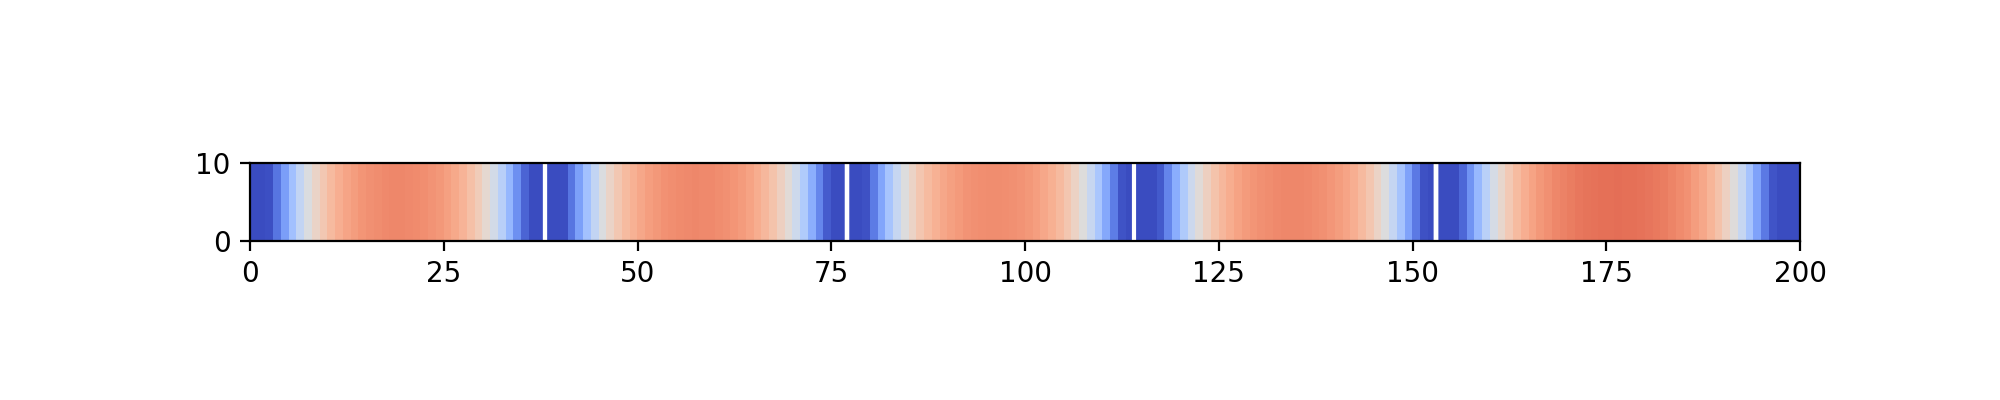

In [11]:
thickness = 10
length = 200
threshold = remote_stress * .9
stress = np.linspace(remote_stress, remote_stress, length)
fig, ax = plot_bed(length, thickness, stress)

In [12]:
while stress.max()> threshold:
    locations = np.where(stress == stress.max())[0]
    pos = np.random.choice(locations)
    if stress[pos] > threshold:
        stress = stress + stress_reduction_due_to_joint(pos, remote_stress, length, thickness)
        update_bed(ax, length, thickness, stress, vmax=remote_stress)
        fig.canvas.draw()
        time.sleep(1)